In [4]:
#Tablas
import pandas as pd
import numpy as np
import os 
# import json
# import hashlib
# import requests
# import datetime
# import requests

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

#Modelos
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
import seaborn as sns



In [5]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)


In [6]:

matches_01=pd.read_csv('Data/Train.csv')#, index_col='match_id')
matches_01.head()

C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (104,178,179,180) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,Set7_Cavalier,Set7_Dragon,Set7_Dragonmancer,Set7_Evoker,Set7_Guardian,Set7_Guild,Set7_Jade,Set7_Legend,Set7_Mage,Set7_Mirage,Set7_Mystic,Set7_Ragewing,Set7_Revel,Set7_Scalescorn,Set7_Shapeshifter,Set7_Shimmerscale,Set7_SpellThief,Set7_Starcaller,Set7_Swiftshot,Set7_Tempest,Set7_Trainer,Set7_Warrior,Set7_Whispers,TFT7_Aatrox,TFT7_Aatrox_item0,TFT7_Aatrox_item1,TFT7_Aatrox_item2,TFT7_Anivia,TFT7_Anivia_item0,TFT7_Anivia_item1,TFT7_Anivia_item2,TFT7_AoShin,TFT7_AoShin_item0,TFT7_AoShin_item1,TFT7_AoShin_item2,TFT7_Ashe,TFT7_Ashe_item0,TFT7_Ashe_item1,TFT7_Ashe_item2,TFT7_AurelionSol,TFT7_AurelionSol_item0,TFT7_AurelionSol_item1,TFT7_AurelionSol_item2,TFT7_Bard,TFT7_Bard_item0,TFT7_Bard_item1,TFT7_Bard_item2,TFT7_Braum,TFT7_Braum_item0,TFT7_Braum_item1,TFT7_Braum_item2,TFT7_Corki,TFT7_Corki_item0,TFT7_Corki_item1,TFT7_Corki_item2,TFT7_Diana,TFT7_Diana_item0,TFT7_Diana_item1,TFT7_Diana_item2,TFT7_DragonBlue,TFT7_DragonBlue_item0,TFT7_DragonBlue_item1,TFT7_DragonBlue_item2,TFT7_DragonGold,TFT7_DragonGold_item0,TFT7_DragonGold_item1,TFT7_DragonGold_item2,TFT7_DragonGreen,TFT7_DragonGreen_item0,TFT7_DragonGreen_item1,TFT7_DragonGreen_item2,TFT7_DragonPurple,TFT7_DragonPurple_item0,TFT7_DragonPurple_item1,TFT7_DragonPurple_item2,TFT7_Elise,TFT7_Elise_item0,TFT7_Elise_item1,TFT7_Elise_item2,TFT7_Ezreal,TFT7_Ezreal_item0,TFT7_Ezreal_item1,TFT7_Ezreal_item2,TFT7_Gnar,TFT7_Gnar_item0,TFT7_Gnar_item1,TFT7_Gnar_item2,TFT7_Hecarim,TFT7_Hecarim_item0,TFT7_Hecarim_item1,TFT7_Hecarim_item2,TFT7_Heimerdinger,TFT7_Heimerdinger_item0,TFT7_Heimerdinger_item1,TFT7_Heimerdinger_item2,TFT7_Illaoi,TFT7_Illaoi_item0,TFT7_Illaoi_item1,TFT7_Illaoi_item2,TFT7_Jinx,TFT7_Jinx_item0,TFT7_Jinx_item1,TFT7_Jinx_item2,TFT7_Karma,TFT7_Karma_item0,TFT7_Karma_item1,TFT7_Karma_item2,TFT7_Kayn,TFT7_Kayn_item0,TFT7_Kayn_item1,TFT7_Kayn_item2,TFT7_LeeSin,TFT7_LeeSin_item0,TFT7_LeeSin_item1,TFT7_LeeSin_item2,TFT7_Leona,TFT7_Leona_item0,TFT7_Leona_item1,TFT7_Leona_item2,TFT7_Lillia,TFT7_Lillia_item0,TFT7_Lillia_item1,TFT7_Lillia_item2,TFT7_Lulu,TFT7_Lulu_item0,TFT7_Lulu_item1,TFT7_Lulu_item2,TFT7_Nami,TFT7_Nami_item0,TFT7_Nami_item1,TFT7_Nami_item2,TFT7_Neeko,TFT7_Neeko_item0,TFT7_Neeko_item1,TFT7_Neeko_item2,TFT7_Nidalee,TFT7_Nidalee_item0,TFT7_Nidalee_item1,TFT7_Nidalee_item2,TFT7_Nunu,TFT7_Nunu_item0,TFT7_Nunu_item1,TFT7_Nunu_item2,TFT7_Olaf,TFT7_Olaf_item0,TFT7_Olaf_item1,TFT7_Olaf_item2,TFT7_Ornn,TFT7_Ornn_item0,TFT7_Ornn_item1,TFT7_Ornn_item2,TFT7_Pyke,TFT7_Pyke_item0,TFT7_Pyke_item1,TFT7_Pyke_item2,TFT7_Qiyana,TFT7_Qiyana_item0,TFT7_Qiyana_item1,TFT7_Qiyana_item2,TFT7_Ryze,TFT7_Ryze_item0,TFT7_Ryze_item1,TFT7_Ryze_item2,TFT7_Sejuani,TFT7_Sejuani_item0,TFT7_Sejuani_item1,TFT7_Sejuani_item2,TFT7_Senna,TFT7_Senna_item0,TFT7_Senna_item1,TFT7_Senna_item2,TFT7_Sett,TFT7_Sett_item0,TFT7_Sett_item1,TFT7_Sett_item2,TFT7_Shen,TFT7_Shen_item0,TFT7_Shen_item1,TFT7_Shen_item2,TFT7_Shyvana,TFT7_Shyvana_item0,TFT7_Shyvana_item1,TFT7_Shyvana_item2,TFT7_Skarner,TFT7_Skarner_item0,TFT7_Skarner_item1,TFT7_Skarner_item2,TFT7_Sona,TFT7_Sona_item0,TFT7_Sona_item1,TFT7_Sona_item2,TFT7_Soraka,TFT7_Soraka_item0,TFT7_Soraka_item1,TFT7_Soraka_item2,TFT7_Swain,TFT7_Swain_item0,TFT7_Swain_item1,TFT7_Swain_item2,TFT7_Sylas,TFT7_Sylas_item0,TFT7_Sylas_item1,TFT7_Sylas_item2,TFT7_TahmKench,TFT7_TahmKench_item0,TFT7_TahmKench_item1,TFT7_TahmKench_item2,TFT7_Talon,TFT7_Talon_item0,TFT7_Talon_item1,TFT7_Talon_item2,TFT7_Taric,TFT7_Taric_item0,TFT7_Taric_item1,TFT7_Taric_item2,TFT7_Thresh,TFT7_Thresh_item0,TFT7_Thresh_item1,TFT7_Thresh_item2,TFT7_TrainerDragon,TFT7_TrainerDragon_item0,TFT7_TrainerDragon_item1,TFT7_TrainerDragon_item2,TFT7_Tristana,TFT7_Tristana_item0,TFT7_Tristana_item1,TFT7_Tristana_item2,TFT7_Twitch,TFT7_Twitch_item0,TFT7_Twitch_item1,TFT7_Twitch_item2,TFT7_Varus,TFT7_Varus_item0,TFT7_Varus_item1,TFT7_Varus_item2,TFT7_Vladimir,TFT7_Vladimir_item0,TFT7_Vladimir_item1,TFT7_Vl

In [7]:
matches_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49144 entries, 0 to 49143
Columns: 269 entries, placement to TFT7_Zoe_item2
dtypes: float64(87), int64(1), object(181)
memory usage: 100.9+ MB


In [8]:
missing_val = matches_01.isnull().sum()
print(missing_val[missing_val > 0])

augment1             29
augment2            196
Set7_Assassin     27303
Set7_Astral       39242
                  ...  
TFT7_Zoe          44581
TFT7_Zoe_item0    45909
TFT7_Zoe_item1    47062
TFT7_Zoe_item2    47896
Length: 266, dtype: int64


In [9]:
#trabajo de datos nulos como da datos 
items_=matches_01.columns[matches_01.columns.str.contains(r'(_item\d$)')]

for column in items_:
    matches_01[column].replace(regex=r'^\w+\w$', value='1',inplace=True)

matches_01[items_] = matches_01[items_].fillna(0)
#cambio de tipos de datos
matches_01[items_]=matches_01[items_].astype(float)

for name in matches_01.select_dtypes("number"):
    matches_01[name] = matches_01[name].fillna(0)

for name in matches_01.select_dtypes("object"):
    matches_01[name] = matches_01[name].fillna("None")

matches_01.head()

C:\Users\Usuario\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,Set7_Cavalier,Set7_Dragon,Set7_Dragonmancer,Set7_Evoker,Set7_Guardian,Set7_Guild,Set7_Jade,Set7_Legend,Set7_Mage,Set7_Mirage,Set7_Mystic,Set7_Ragewing,Set7_Revel,Set7_Scalescorn,Set7_Shapeshifter,Set7_Shimmerscale,Set7_SpellThief,Set7_Starcaller,Set7_Swiftshot,Set7_Tempest,Set7_Trainer,Set7_Warrior,Set7_Whispers,TFT7_Aatrox,TFT7_Aatrox_item0,TFT7_Aatrox_item1,TFT7_Aatrox_item2,TFT7_Anivia,TFT7_Anivia_item0,TFT7_Anivia_item1,TFT7_Anivia_item2,TFT7_AoShin,TFT7_AoShin_item0,TFT7_AoShin_item1,TFT7_AoShin_item2,TFT7_Ashe,TFT7_Ashe_item0,TFT7_Ashe_item1,TFT7_Ashe_item2,TFT7_AurelionSol,TFT7_AurelionSol_item0,TFT7_AurelionSol_item1,TFT7_AurelionSol_item2,TFT7_Bard,TFT7_Bard_item0,TFT7_Bard_item1,TFT7_Bard_item2,TFT7_Braum,TFT7_Braum_item0,TFT7_Braum_item1,TFT7_Braum_item2,TFT7_Corki,TFT7_Corki_item0,TFT7_Corki_item1,TFT7_Corki_item2,TFT7_Diana,TFT7_Diana_item0,TFT7_Diana_item1,TFT7_Diana_item2,TFT7_DragonBlue,TFT7_DragonBlue_item0,TFT7_DragonBlue_item1,TFT7_DragonBlue_item2,TFT7_DragonGold,TFT7_DragonGold_item0,TFT7_DragonGold_item1,TFT7_DragonGold_item2,TFT7_DragonGreen,TFT7_DragonGreen_item0,TFT7_DragonGreen_item1,TFT7_DragonGreen_item2,TFT7_DragonPurple,TFT7_DragonPurple_item0,TFT7_DragonPurple_item1,TFT7_DragonPurple_item2,TFT7_Elise,TFT7_Elise_item0,TFT7_Elise_item1,TFT7_Elise_item2,TFT7_Ezreal,TFT7_Ezreal_item0,TFT7_Ezreal_item1,TFT7_Ezreal_item2,TFT7_Gnar,TFT7_Gnar_item0,TFT7_Gnar_item1,TFT7_Gnar_item2,TFT7_Hecarim,TFT7_Hecarim_item0,TFT7_Hecarim_item1,TFT7_Hecarim_item2,TFT7_Heimerdinger,TFT7_Heimerdinger_item0,TFT7_Heimerdinger_item1,TFT7_Heimerdinger_item2,TFT7_Illaoi,TFT7_Illaoi_item0,TFT7_Illaoi_item1,TFT7_Illaoi_item2,TFT7_Jinx,TFT7_Jinx_item0,TFT7_Jinx_item1,TFT7_Jinx_item2,TFT7_Karma,TFT7_Karma_item0,TFT7_Karma_item1,TFT7_Karma_item2,TFT7_Kayn,TFT7_Kayn_item0,TFT7_Kayn_item1,TFT7_Kayn_item2,TFT7_LeeSin,TFT7_LeeSin_item0,TFT7_LeeSin_item1,TFT7_LeeSin_item2,TFT7_Leona,TFT7_Leona_item0,TFT7_Leona_item1,TFT7_Leona_item2,TFT7_Lillia,TFT7_Lillia_item0,TFT7_Lillia_item1,TFT7_Lillia_item2,TFT7_Lulu,TFT7_Lulu_item0,TFT7_Lulu_item1,TFT7_Lulu_item2,TFT7_Nami,TFT7_Nami_item0,TFT7_Nami_item1,TFT7_Nami_item2,TFT7_Neeko,TFT7_Neeko_item0,TFT7_Neeko_item1,TFT7_Neeko_item2,TFT7_Nidalee,TFT7_Nidalee_item0,TFT7_Nidalee_item1,TFT7_Nidalee_item2,TFT7_Nunu,TFT7_Nunu_item0,TFT7_Nunu_item1,TFT7_Nunu_item2,TFT7_Olaf,TFT7_Olaf_item0,TFT7_Olaf_item1,TFT7_Olaf_item2,TFT7_Ornn,TFT7_Ornn_item0,TFT7_Ornn_item1,TFT7_Ornn_item2,TFT7_Pyke,TFT7_Pyke_item0,TFT7_Pyke_item1,TFT7_Pyke_item2,TFT7_Qiyana,TFT7_Qiyana_item0,TFT7_Qiyana_item1,TFT7_Qiyana_item2,TFT7_Ryze,TFT7_Ryze_item0,TFT7_Ryze_item1,TFT7_Ryze_item2,TFT7_Sejuani,TFT7_Sejuani_item0,TFT7_Sejuani_item1,TFT7_Sejuani_item2,TFT7_Senna,TFT7_Senna_item0,TFT7_Senna_item1,TFT7_Senna_item2,TFT7_Sett,TFT7_Sett_item0,TFT7_Sett_item1,TFT7_Sett_item2,TFT7_Shen,TFT7_Shen_item0,TFT7_Shen_item1,TFT7_Shen_item2,TFT7_Shyvana,TFT7_Shyvana_item0,TFT7_Shyvana_item1,TFT7_Shyvana_item2,TFT7_Skarner,TFT7_Skarner_item0,TFT7_Skarner_item1,TFT7_Skarner_item2,TFT7_Sona,TFT7_Sona_item0,TFT7_Sona_item1,TFT7_Sona_item2,TFT7_Soraka,TFT7_Soraka_item0,TFT7_Soraka_item1,TFT7_Soraka_item2,TFT7_Swain,TFT7_Swain_item0,TFT7_Swain_item1,TFT7_Swain_item2,TFT7_Sylas,TFT7_Sylas_item0,TFT7_Sylas_item1,TFT7_Sylas_item2,TFT7_TahmKench,TFT7_TahmKench_item0,TFT7_TahmKench_item1,TFT7_TahmKench_item2,TFT7_Talon,TFT7_Talon_item0,TFT7_Talon_item1,TFT7_Talon_item2,TFT7_Taric,TFT7_Taric_item0,TFT7_Taric_item1,TFT7_Taric_item2,TFT7_Thresh,TFT7_Thresh_item0,TFT7_Thresh_item1,TFT7_Thresh_item2,TFT7_TrainerDragon,TFT7_TrainerDragon_item0,TFT7_TrainerDragon_item1,TFT7_TrainerDragon_item2,TFT7_Tristana,TFT7_Tristana_item0,TFT7_Tristana_item1,TFT7_Tristana_item2,TFT7_Twitch,TFT7_Twitch_item0,TFT7_Twitch_item1,TFT7_Twitch_item2,TFT7_Varus,TFT7_Varus_item0,TFT7_Varus_item1,TFT7_Varus_item2,TFT7_Vladimir,TFT7_Vladimir_item0,TFT7_Vladimir_item1,TFT7_Vl

In [10]:
#sacar palabras extra en el data set
matches_01['augment0']=matches_01['augment0'].str.split('_').str.get(-1)
matches_01['augment1']=matches_01['augment1'].str.split('_').str.get(-1)
matches_01['augment2']=matches_01['augment2'].str.split('_').str.get(-1)
matches_01.head()

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,Set7_Cavalier,Set7_Dragon,Set7_Dragonmancer,Set7_Evoker,Set7_Guardian,Set7_Guild,Set7_Jade,Set7_Legend,Set7_Mage,Set7_Mirage,Set7_Mystic,Set7_Ragewing,Set7_Revel,Set7_Scalescorn,Set7_Shapeshifter,Set7_Shimmerscale,Set7_SpellThief,Set7_Starcaller,Set7_Swiftshot,Set7_Tempest,Set7_Trainer,Set7_Warrior,Set7_Whispers,TFT7_Aatrox,TFT7_Aatrox_item0,TFT7_Aatrox_item1,TFT7_Aatrox_item2,TFT7_Anivia,TFT7_Anivia_item0,TFT7_Anivia_item1,TFT7_Anivia_item2,TFT7_AoShin,TFT7_AoShin_item0,TFT7_AoShin_item1,TFT7_AoShin_item2,TFT7_Ashe,TFT7_Ashe_item0,TFT7_Ashe_item1,TFT7_Ashe_item2,TFT7_AurelionSol,TFT7_AurelionSol_item0,TFT7_AurelionSol_item1,TFT7_AurelionSol_item2,TFT7_Bard,TFT7_Bard_item0,TFT7_Bard_item1,TFT7_Bard_item2,TFT7_Braum,TFT7_Braum_item0,TFT7_Braum_item1,TFT7_Braum_item2,TFT7_Corki,TFT7_Corki_item0,TFT7_Corki_item1,TFT7_Corki_item2,TFT7_Diana,TFT7_Diana_item0,TFT7_Diana_item1,TFT7_Diana_item2,TFT7_DragonBlue,TFT7_DragonBlue_item0,TFT7_DragonBlue_item1,TFT7_DragonBlue_item2,TFT7_DragonGold,TFT7_DragonGold_item0,TFT7_DragonGold_item1,TFT7_DragonGold_item2,TFT7_DragonGreen,TFT7_DragonGreen_item0,TFT7_DragonGreen_item1,TFT7_DragonGreen_item2,TFT7_DragonPurple,TFT7_DragonPurple_item0,TFT7_DragonPurple_item1,TFT7_DragonPurple_item2,TFT7_Elise,TFT7_Elise_item0,TFT7_Elise_item1,TFT7_Elise_item2,TFT7_Ezreal,TFT7_Ezreal_item0,TFT7_Ezreal_item1,TFT7_Ezreal_item2,TFT7_Gnar,TFT7_Gnar_item0,TFT7_Gnar_item1,TFT7_Gnar_item2,TFT7_Hecarim,TFT7_Hecarim_item0,TFT7_Hecarim_item1,TFT7_Hecarim_item2,TFT7_Heimerdinger,TFT7_Heimerdinger_item0,TFT7_Heimerdinger_item1,TFT7_Heimerdinger_item2,TFT7_Illaoi,TFT7_Illaoi_item0,TFT7_Illaoi_item1,TFT7_Illaoi_item2,TFT7_Jinx,TFT7_Jinx_item0,TFT7_Jinx_item1,TFT7_Jinx_item2,TFT7_Karma,TFT7_Karma_item0,TFT7_Karma_item1,TFT7_Karma_item2,TFT7_Kayn,TFT7_Kayn_item0,TFT7_Kayn_item1,TFT7_Kayn_item2,TFT7_LeeSin,TFT7_LeeSin_item0,TFT7_LeeSin_item1,TFT7_LeeSin_item2,TFT7_Leona,TFT7_Leona_item0,TFT7_Leona_item1,TFT7_Leona_item2,TFT7_Lillia,TFT7_Lillia_item0,TFT7_Lillia_item1,TFT7_Lillia_item2,TFT7_Lulu,TFT7_Lulu_item0,TFT7_Lulu_item1,TFT7_Lulu_item2,TFT7_Nami,TFT7_Nami_item0,TFT7_Nami_item1,TFT7_Nami_item2,TFT7_Neeko,TFT7_Neeko_item0,TFT7_Neeko_item1,TFT7_Neeko_item2,TFT7_Nidalee,TFT7_Nidalee_item0,TFT7_Nidalee_item1,TFT7_Nidalee_item2,TFT7_Nunu,TFT7_Nunu_item0,TFT7_Nunu_item1,TFT7_Nunu_item2,TFT7_Olaf,TFT7_Olaf_item0,TFT7_Olaf_item1,TFT7_Olaf_item2,TFT7_Ornn,TFT7_Ornn_item0,TFT7_Ornn_item1,TFT7_Ornn_item2,TFT7_Pyke,TFT7_Pyke_item0,TFT7_Pyke_item1,TFT7_Pyke_item2,TFT7_Qiyana,TFT7_Qiyana_item0,TFT7_Qiyana_item1,TFT7_Qiyana_item2,TFT7_Ryze,TFT7_Ryze_item0,TFT7_Ryze_item1,TFT7_Ryze_item2,TFT7_Sejuani,TFT7_Sejuani_item0,TFT7_Sejuani_item1,TFT7_Sejuani_item2,TFT7_Senna,TFT7_Senna_item0,TFT7_Senna_item1,TFT7_Senna_item2,TFT7_Sett,TFT7_Sett_item0,TFT7_Sett_item1,TFT7_Sett_item2,TFT7_Shen,TFT7_Shen_item0,TFT7_Shen_item1,TFT7_Shen_item2,TFT7_Shyvana,TFT7_Shyvana_item0,TFT7_Shyvana_item1,TFT7_Shyvana_item2,TFT7_Skarner,TFT7_Skarner_item0,TFT7_Skarner_item1,TFT7_Skarner_item2,TFT7_Sona,TFT7_Sona_item0,TFT7_Sona_item1,TFT7_Sona_item2,TFT7_Soraka,TFT7_Soraka_item0,TFT7_Soraka_item1,TFT7_Soraka_item2,TFT7_Swain,TFT7_Swain_item0,TFT7_Swain_item1,TFT7_Swain_item2,TFT7_Sylas,TFT7_Sylas_item0,TFT7_Sylas_item1,TFT7_Sylas_item2,TFT7_TahmKench,TFT7_TahmKench_item0,TFT7_TahmKench_item1,TFT7_TahmKench_item2,TFT7_Talon,TFT7_Talon_item0,TFT7_Talon_item1,TFT7_Talon_item2,TFT7_Taric,TFT7_Taric_item0,TFT7_Taric_item1,TFT7_Taric_item2,TFT7_Thresh,TFT7_Thresh_item0,TFT7_Thresh_item1,TFT7_Thresh_item2,TFT7_TrainerDragon,TFT7_TrainerDragon_item0,TFT7_TrainerDragon_item1,TFT7_TrainerDragon_item2,TFT7_Tristana,TFT7_Tristana_item0,TFT7_Tristana_item1,TFT7_Tristana_item2,TFT7_Twitch,TFT7_Twitch_item0,TFT7_Twitch_item1,TFT7_Twitch_item2,TFT7_Varus,TFT7_Varus_item0,TFT7_Varus_item1,TFT7_Varus_item2,TFT7_Vladimir,TFT7_Vladimir_item0,TFT7_Vladimir_item1,TFT7_Vl

In [11]:
#solo se cuentan los tres primeros puestos con 1
#todoso los demas son 0
placement = {
    1: 1,
    2: 1,
    3: 1,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
}
matches_01['placement'] = matches_01['placement'].replace(placement)

In [12]:
matches_01.head()

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,Set7_Cavalier,Set7_Dragon,Set7_Dragonmancer,Set7_Evoker,Set7_Guardian,Set7_Guild,Set7_Jade,Set7_Legend,Set7_Mage,Set7_Mirage,Set7_Mystic,Set7_Ragewing,Set7_Revel,Set7_Scalescorn,Set7_Shapeshifter,Set7_Shimmerscale,Set7_SpellThief,Set7_Starcaller,Set7_Swiftshot,Set7_Tempest,Set7_Trainer,Set7_Warrior,Set7_Whispers,TFT7_Aatrox,TFT7_Aatrox_item0,TFT7_Aatrox_item1,TFT7_Aatrox_item2,TFT7_Anivia,TFT7_Anivia_item0,TFT7_Anivia_item1,TFT7_Anivia_item2,TFT7_AoShin,TFT7_AoShin_item0,TFT7_AoShin_item1,TFT7_AoShin_item2,TFT7_Ashe,TFT7_Ashe_item0,TFT7_Ashe_item1,TFT7_Ashe_item2,TFT7_AurelionSol,TFT7_AurelionSol_item0,TFT7_AurelionSol_item1,TFT7_AurelionSol_item2,TFT7_Bard,TFT7_Bard_item0,TFT7_Bard_item1,TFT7_Bard_item2,TFT7_Braum,TFT7_Braum_item0,TFT7_Braum_item1,TFT7_Braum_item2,TFT7_Corki,TFT7_Corki_item0,TFT7_Corki_item1,TFT7_Corki_item2,TFT7_Diana,TFT7_Diana_item0,TFT7_Diana_item1,TFT7_Diana_item2,TFT7_DragonBlue,TFT7_DragonBlue_item0,TFT7_DragonBlue_item1,TFT7_DragonBlue_item2,TFT7_DragonGold,TFT7_DragonGold_item0,TFT7_DragonGold_item1,TFT7_DragonGold_item2,TFT7_DragonGreen,TFT7_DragonGreen_item0,TFT7_DragonGreen_item1,TFT7_DragonGreen_item2,TFT7_DragonPurple,TFT7_DragonPurple_item0,TFT7_DragonPurple_item1,TFT7_DragonPurple_item2,TFT7_Elise,TFT7_Elise_item0,TFT7_Elise_item1,TFT7_Elise_item2,TFT7_Ezreal,TFT7_Ezreal_item0,TFT7_Ezreal_item1,TFT7_Ezreal_item2,TFT7_Gnar,TFT7_Gnar_item0,TFT7_Gnar_item1,TFT7_Gnar_item2,TFT7_Hecarim,TFT7_Hecarim_item0,TFT7_Hecarim_item1,TFT7_Hecarim_item2,TFT7_Heimerdinger,TFT7_Heimerdinger_item0,TFT7_Heimerdinger_item1,TFT7_Heimerdinger_item2,TFT7_Illaoi,TFT7_Illaoi_item0,TFT7_Illaoi_item1,TFT7_Illaoi_item2,TFT7_Jinx,TFT7_Jinx_item0,TFT7_Jinx_item1,TFT7_Jinx_item2,TFT7_Karma,TFT7_Karma_item0,TFT7_Karma_item1,TFT7_Karma_item2,TFT7_Kayn,TFT7_Kayn_item0,TFT7_Kayn_item1,TFT7_Kayn_item2,TFT7_LeeSin,TFT7_LeeSin_item0,TFT7_LeeSin_item1,TFT7_LeeSin_item2,TFT7_Leona,TFT7_Leona_item0,TFT7_Leona_item1,TFT7_Leona_item2,TFT7_Lillia,TFT7_Lillia_item0,TFT7_Lillia_item1,TFT7_Lillia_item2,TFT7_Lulu,TFT7_Lulu_item0,TFT7_Lulu_item1,TFT7_Lulu_item2,TFT7_Nami,TFT7_Nami_item0,TFT7_Nami_item1,TFT7_Nami_item2,TFT7_Neeko,TFT7_Neeko_item0,TFT7_Neeko_item1,TFT7_Neeko_item2,TFT7_Nidalee,TFT7_Nidalee_item0,TFT7_Nidalee_item1,TFT7_Nidalee_item2,TFT7_Nunu,TFT7_Nunu_item0,TFT7_Nunu_item1,TFT7_Nunu_item2,TFT7_Olaf,TFT7_Olaf_item0,TFT7_Olaf_item1,TFT7_Olaf_item2,TFT7_Ornn,TFT7_Ornn_item0,TFT7_Ornn_item1,TFT7_Ornn_item2,TFT7_Pyke,TFT7_Pyke_item0,TFT7_Pyke_item1,TFT7_Pyke_item2,TFT7_Qiyana,TFT7_Qiyana_item0,TFT7_Qiyana_item1,TFT7_Qiyana_item2,TFT7_Ryze,TFT7_Ryze_item0,TFT7_Ryze_item1,TFT7_Ryze_item2,TFT7_Sejuani,TFT7_Sejuani_item0,TFT7_Sejuani_item1,TFT7_Sejuani_item2,TFT7_Senna,TFT7_Senna_item0,TFT7_Senna_item1,TFT7_Senna_item2,TFT7_Sett,TFT7_Sett_item0,TFT7_Sett_item1,TFT7_Sett_item2,TFT7_Shen,TFT7_Shen_item0,TFT7_Shen_item1,TFT7_Shen_item2,TFT7_Shyvana,TFT7_Shyvana_item0,TFT7_Shyvana_item1,TFT7_Shyvana_item2,TFT7_Skarner,TFT7_Skarner_item0,TFT7_Skarner_item1,TFT7_Skarner_item2,TFT7_Sona,TFT7_Sona_item0,TFT7_Sona_item1,TFT7_Sona_item2,TFT7_Soraka,TFT7_Soraka_item0,TFT7_Soraka_item1,TFT7_Soraka_item2,TFT7_Swain,TFT7_Swain_item0,TFT7_Swain_item1,TFT7_Swain_item2,TFT7_Sylas,TFT7_Sylas_item0,TFT7_Sylas_item1,TFT7_Sylas_item2,TFT7_TahmKench,TFT7_TahmKench_item0,TFT7_TahmKench_item1,TFT7_TahmKench_item2,TFT7_Talon,TFT7_Talon_item0,TFT7_Talon_item1,TFT7_Talon_item2,TFT7_Taric,TFT7_Taric_item0,TFT7_Taric_item1,TFT7_Taric_item2,TFT7_Thresh,TFT7_Thresh_item0,TFT7_Thresh_item1,TFT7_Thresh_item2,TFT7_TrainerDragon,TFT7_TrainerDragon_item0,TFT7_TrainerDragon_item1,TFT7_TrainerDragon_item2,TFT7_Tristana,TFT7_Tristana_item0,TFT7_Tristana_item1,TFT7_Tristana_item2,TFT7_Twitch,TFT7_Twitch_item0,TFT7_Twitch_item1,TFT7_Twitch_item2,TFT7_Varus,TFT7_Varus_item0,TFT7_Varus_item1,TFT7_Varus_item2,TFT7_Vladimir,TFT7_Vladimir_item0,TFT7_Vladimir_item1,TFT7_Vl

In [13]:
matches_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49144 entries, 0 to 49143
Columns: 269 entries, placement to TFT7_Zoe_item2
dtypes: float64(264), int64(1), object(4)
memory usage: 100.9+ MB


In [14]:
#Cantidad total de items por personaje
names=['Aatrox_item', 'Anivia_item','AoShin_item','Ashe_item','AurelionSol_item','Bard_item','Braum_item','Corki_item','Diana_item',
       'DragonBlue_item','DragonGold_item','DragonGreen_item','DragonPurple_item','Elise_item','Ezreal_item','Gnar_item','Hecarim_item',
       'Heimerdinger_item','Illaoi_item','Jinx_item','Karma_item','Kayn_item','LeeSin_item','Leona_item','Lillia_item','Lulu_item','Nami_item',
       'Neeko_item','Nidalee_item','Nunu_item','Nunu_item','Ornn_item','Pyke_item','Qiyana_item','Ryze_item','Sejuani_item','Senna_item',
       'Sett_item','Shen_item','Shyvana_item','Skarner_item','Sona_item','Soraka_item','Swain_item','Sylas_item','TahmKench_item','Talon_item',
       'Taric_item','Thresh_item','TrainerDragon_item','Tristana_item','Twitch_item','Varus_item','Vladimir_item','Volibear_item','Xayah_item',
       'Yasuo_item','Yone_item','Zoe_item']
for a in names:
    matches_01[a]=matches_01.loc[:,'TFT7_'+a+'0':'TFT7_'+a+'2'].sum(axis=1)

matches_01.head()


,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,Set7_Cavalier,Set7_Dragon,Set7_Dragonmancer,Set7_Evoker,Set7_Guardian,Set7_Guild,Set7_Jade,Set7_Legend,Set7_Mage,Set7_Mirage,Set7_Mystic,Set7_Ragewing,Set7_Revel,Set7_Scalescorn,Set7_Shapeshifter,Set7_Shimmerscale,Set7_SpellThief,Set7_Starcaller,Set7_Swiftshot,Set7_Tempest,Set7_Trainer,Set7_Warrior,Set7_Whispers,TFT7_Aatrox,TFT7_Aatrox_item0,TFT7_Aatrox_item1,TFT7_Aatrox_item2,TFT7_Anivia,TFT7_Anivia_item0,TFT7_Anivia_item1,TFT7_Anivia_item2,TFT7_AoShin,TFT7_AoShin_item0,TFT7_AoShin_item1,TFT7_AoShin_item2,TFT7_Ashe,TFT7_Ashe_item0,TFT7_Ashe_item1,TFT7_Ashe_item2,TFT7_AurelionSol,TFT7_AurelionSol_item0,TFT7_AurelionSol_item1,TFT7_AurelionSol_item2,TFT7_Bard,TFT7_Bard_item0,TFT7_Bard_item1,TFT7_Bard_item2,TFT7_Braum,TFT7_Braum_item0,TFT7_Braum_item1,TFT7_Braum_item2,TFT7_Corki,TFT7_Corki_item0,TFT7_Corki_item1,TFT7_Corki_item2,TFT7_Diana,TFT7_Diana_item0,TFT7_Diana_item1,TFT7_Diana_item2,TFT7_DragonBlue,TFT7_DragonBlue_item0,TFT7_DragonBlue_item1,TFT7_DragonBlue_item2,TFT7_DragonGold,TFT7_DragonGold_item0,TFT7_DragonGold_item1,TFT7_DragonGold_item2,TFT7_DragonGreen,TFT7_DragonGreen_item0,TFT7_DragonGreen_item1,TFT7_DragonGreen_item2,TFT7_DragonPurple,TFT7_DragonPurple_item0,TFT7_DragonPurple_item1,TFT7_DragonPurple_item2,TFT7_Elise,TFT7_Elise_item0,TFT7_Elise_item1,TFT7_Elise_item2,TFT7_Ezreal,TFT7_Ezreal_item0,TFT7_Ezreal_item1,TFT7_Ezreal_item2,TFT7_Gnar,TFT7_Gnar_item0,TFT7_Gnar_item1,TFT7_Gnar_item2,TFT7_Hecarim,TFT7_Hecarim_item0,TFT7_Hecarim_item1,TFT7_Hecarim_item2,TFT7_Heimerdinger,TFT7_Heimerdinger_item0,TFT7_Heimerdinger_item1,TFT7_Heimerdinger_item2,TFT7_Illaoi,TFT7_Illaoi_item0,TFT7_Illaoi_item1,TFT7_Illaoi_item2,TFT7_Jinx,TFT7_Jinx_item0,TFT7_Jinx_item1,TFT7_Jinx_item2,TFT7_Karma,TFT7_Karma_item0,TFT7_Karma_item1,TFT7_Karma_item2,TFT7_Kayn,TFT7_Kayn_item0,TFT7_Kayn_item1,TFT7_Kayn_item2,TFT7_LeeSin,TFT7_LeeSin_item0,TFT7_LeeSin_item1,TFT7_LeeSin_item2,TFT7_Leona,TFT7_Leona_item0,TFT7_Leona_item1,TFT7_Leona_item2,TFT7_Lillia,TFT7_Lillia_item0,TFT7_Lillia_item1,TFT7_Lillia_item2,TFT7_Lulu,TFT7_Lulu_item0,TFT7_Lulu_item1,TFT7_Lulu_item2,TFT7_Nami,TFT7_Nami_item0,TFT7_Nami_item1,TFT7_Nami_item2,TFT7_Neeko,TFT7_Neeko_item0,TFT7_Neeko_item1,TFT7_Neeko_item2,TFT7_Nidalee,TFT7_Nidalee_item0,TFT7_Nidalee_item1,TFT7_Nidalee_item2,TFT7_Nunu,TFT7_Nunu_item0,TFT7_Nunu_item1,TFT7_Nunu_item2,TFT7_Olaf,TFT7_Olaf_item0,TFT7_Olaf_item1,TFT7_Olaf_item2,TFT7_Ornn,TFT7_Ornn_item0,TFT7_Ornn_item1,TFT7_Ornn_item2,TFT7_Pyke,TFT7_Pyke_item0,TFT7_Pyke_item1,TFT7_Pyke_item2,TFT7_Qiyana,TFT7_Qiyana_item0,TFT7_Qiyana_item1,TFT7_Qiyana_item2,TFT7_Ryze,TFT7_Ryze_item0,TFT7_Ryze_item1,TFT7_Ryze_item2,TFT7_Sejuani,TFT7_Sejuani_item0,TFT7_Sejuani_item1,TFT7_Sejuani_item2,TFT7_Senna,TFT7_Senna_item0,TFT7_Senna_item1,TFT7_Senna_item2,TFT7_Sett,TFT7_Sett_item0,TFT7_Sett_item1,TFT7_Sett_item2,TFT7_Shen,TFT7_Shen_item0,TFT7_Shen_item1,TFT7_Shen_item2,TFT7_Shyvana,TFT7_Shyvana_item0,TFT7_Shyvana_item1,TFT7_Shyvana_item2,TFT7_Skarner,TFT7_Skarner_item0,TFT7_Skarner_item1,TFT7_Skarner_item2,TFT7_Sona,TFT7_Sona_item0,TFT7_Sona_item1,TFT7_Sona_item2,TFT7_Soraka,TFT7_Soraka_item0,TFT7_Soraka_item1,TFT7_Soraka_item2,TFT7_Swain,TFT7_Swain_item0,TFT7_Swain_item1,TFT7_Swain_item2,TFT7_Sylas,TFT7_Sylas_item0,TFT7_Sylas_item1,TFT7_Sylas_item2,TFT7_TahmKench,TFT7_TahmKench_item0,TFT7_TahmKench_item1,TFT7_TahmKench_item2,TFT7_Talon,TFT7_Talon_item0,TFT7_Talon_item1,TFT7_Talon_item2,TFT7_Taric,TFT7_Taric_item0,TFT7_Taric_item1,TFT7_Taric_item2,TFT7_Thresh,TFT7_Thresh_item0,TFT7_Thresh_item1,TFT7_Thresh_item2,TFT7_TrainerDragon,TFT7_TrainerDragon_item0,TFT7_TrainerDragon_item1,TFT7_TrainerDragon_item2,TFT7_Tristana,TFT7_Tristana_item0,TFT7_Tristana_item1,TFT7_Tristana_item2,TFT7_Twitch,TFT7_Twitch_item0,TFT7_Twitch_item1,TFT7_Twitch_item2,TFT7_Varus,TFT7_Varus_item0,TFT7_Varus_item1,TFT7_Varus_item2,TFT7_Vladimir,TFT7_Vladimir_item0,TFT7_Vladimir_item1,TFT7_Vl

In [15]:
matches_01.drop(items_,axis=1,inplace=True)
matches_01.head()

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,Set7_Cavalier,Set7_Dragon,Set7_Dragonmancer,Set7_Evoker,Set7_Guardian,Set7_Guild,Set7_Jade,Set7_Legend,Set7_Mage,Set7_Mirage,Set7_Mystic,Set7_Ragewing,Set7_Revel,Set7_Scalescorn,Set7_Shapeshifter,Set7_Shimmerscale,Set7_SpellThief,Set7_Starcaller,Set7_Swiftshot,Set7_Tempest,Set7_Trainer,Set7_Warrior,Set7_Whispers,TFT7_Aatrox,TFT7_Anivia,TFT7_AoShin,TFT7_Ashe,TFT7_AurelionSol,TFT7_Bard,TFT7_Braum,TFT7_Corki,TFT7_Diana,TFT7_DragonBlue,TFT7_DragonGold,TFT7_DragonGreen,TFT7_DragonPurple,TFT7_Elise,TFT7_Ezreal,TFT7_Gnar,TFT7_Hecarim,TFT7_Heimerdinger,TFT7_Illaoi,TFT7_Jinx,TFT7_Karma,TFT7_Kayn,TFT7_LeeSin,TFT7_Leona,TFT7_Lillia,TFT7_Lulu,TFT7_Nami,TFT7_Neeko,TFT7_Nidalee,TFT7_Nunu,TFT7_Olaf,TFT7_Ornn,TFT7_Pyke,TFT7_Qiyana,TFT7_Ryze,TFT7_Sejuani,TFT7_Senna,TFT7_Sett,TFT7_Shen,TFT7_Shyvana,TFT7_Skarner,TFT7_Sona,TFT7_Soraka,TFT7_Swain,TFT7_Sylas,TFT7_TahmKench,TFT7_Talon,TFT7_Taric,TFT7_Thresh,TFT7_TrainerDragon,TFT7_Tristana,TFT7_Twitch,TFT7_Varus,TFT7_Vladimir,TFT7_Volibear,TFT7_Xayah,TFT7_Yasuo,TFT7_Yone,TFT7_Zoe,Aatrox_item,Anivia_item,AoShin_item,Ashe_item,AurelionSol_item,Bard_item,Braum_item,Corki_item,Diana_item,DragonBlue_item,DragonGold_item,DragonGreen_item,DragonPurple_item,Elise_item,Ezreal_item,Gnar_item,Hecarim_item,Heimerdinger_item,Illaoi_item,Jinx_item,Karma_item,Kayn_item,LeeSin_item,Leona_item,Lillia_item,Lulu_item,Nami_item,Neeko_item,Nidalee_item,Nunu_item,Ornn_item,Pyke_item,Qiyana_item,Ryze_item,Sejuani_item,Senna_item,Sett_item,Shen_item,Shyvana_item,Skarner_item,Sona_item,Soraka_item,Swain_item,Sylas_item,TahmKench_item,Talon_item,Taric_item,Thresh_item,TrainerDragon_item,Tristana_item,Twitch_item,Varus_item,Vladimir_item,Volibear_item,Xayah_item,Yasuo_item,Yone_item,Zoe_item
0,1,NA1_4371790614,PortableForge,Weakspot,CyberneticImplants2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1,1,NA1_4371790614,PortableForge,CelestialBlessing1,BigFriend2,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,NA1_4371790614,AxiomArc2,SecondWind1,CyberneticImplants2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,NA1_4371790614,ShapeshifterBeastsDen,CelestialBlessing1,PortableForge,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0

In [16]:
#acomodar el nombre de los personajes
a=matches_01.columns[matches_01.columns.str.startswith('TFT7_')]
b=a.str.split('TFT7_').str.get(-1)
name=0
for i in a:
    matches_01.rename(columns = {i:b[name]},inplace=True)
    name=name+1

matches_01.head()

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,Set7_Cavalier,Set7_Dragon,Set7_Dragonmancer,Set7_Evoker,Set7_Guardian,Set7_Guild,Set7_Jade,Set7_Legend,Set7_Mage,Set7_Mirage,Set7_Mystic,Set7_Ragewing,Set7_Revel,Set7_Scalescorn,Set7_Shapeshifter,Set7_Shimmerscale,Set7_SpellThief,Set7_Starcaller,Set7_Swiftshot,Set7_Tempest,Set7_Trainer,Set7_Warrior,Set7_Whispers,Aatrox,Anivia,AoShin,Ashe,AurelionSol,Bard,Braum,Corki,Diana,DragonBlue,DragonGold,DragonGreen,DragonPurple,Elise,Ezreal,Gnar,Hecarim,Heimerdinger,Illaoi,Jinx,Karma,Kayn,LeeSin,Leona,Lillia,Lulu,Nami,Neeko,Nidalee,Nunu,Olaf,Ornn,Pyke,Qiyana,Ryze,Sejuani,Senna,Sett,Shen,Shyvana,Skarner,Sona,Soraka,Swain,Sylas,TahmKench,Talon,Taric,Thresh,TrainerDragon,Tristana,Twitch,Varus,Vladimir,Volibear,Xayah,Yasuo,Yone,Zoe,Aatrox_item,Anivia_item,AoShin_item,Ashe_item,AurelionSol_item,Bard_item,Braum_item,Corki_item,Diana_item,DragonBlue_item,DragonGold_item,DragonGreen_item,DragonPurple_item,Elise_item,Ezreal_item,Gnar_item,Hecarim_item,Heimerdinger_item,Illaoi_item,Jinx_item,Karma_item,Kayn_item,LeeSin_item,Leona_item,Lillia_item,Lulu_item,Nami_item,Neeko_item,Nidalee_item,Nunu_item,Ornn_item,Pyke_item,Qiyana_item,Ryze_item,Sejuani_item,Senna_item,Sett_item,Shen_item,Shyvana_item,Skarner_item,Sona_item,Soraka_item,Swain_item,Sylas_item,TahmKench_item,Talon_item,Taric_item,Thresh_item,TrainerDragon_item,Tristana_item,Twitch_item,Varus_item,Vladimir_item,Volibear_item,Xayah_item,Yasuo_item,Yone_item,Zoe_item
0,1,NA1_4371790614,PortableForge,Weakspot,CyberneticImplants2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1,1,NA1_4371790614,PortableForge,CelestialBlessing1,BigFriend2,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,NA1_4371790614,AxiomArc2,SecondWind1,CyberneticImplants2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,NA1_4371790614,ShapeshifterBeastsDen,CelestialBlessing1,PortableForge,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.

In [17]:
#revisar
matches_01[matches_01.eq("TheGoldenEggHR").any(1)]

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,Set7_Cavalier,Set7_Dragon,Set7_Dragonmancer,Set7_Evoker,Set7_Guardian,Set7_Guild,Set7_Jade,Set7_Legend,Set7_Mage,Set7_Mirage,Set7_Mystic,Set7_Ragewing,Set7_Revel,Set7_Scalescorn,Set7_Shapeshifter,Set7_Shimmerscale,Set7_SpellThief,Set7_Starcaller,Set7_Swiftshot,Set7_Tempest,Set7_Trainer,Set7_Warrior,Set7_Whispers,Aatrox,Anivia,AoShin,Ashe,AurelionSol,Bard,Braum,Corki,Diana,DragonBlue,DragonGold,DragonGreen,DragonPurple,Elise,Ezreal,Gnar,Hecarim,Heimerdinger,Illaoi,Jinx,Karma,Kayn,LeeSin,Leona,Lillia,Lulu,Nami,Neeko,Nidalee,Nunu,Olaf,Ornn,Pyke,Qiyana,Ryze,Sejuani,Senna,Sett,Shen,Shyvana,Skarner,Sona,Soraka,Swain,Sylas,TahmKench,Talon,Taric,Thresh,TrainerDragon,Tristana,Twitch,Varus,Vladimir,Volibear,Xayah,Yasuo,Yone,Zoe,Aatrox_item,Anivia_item,AoShin_item,Ashe_item,AurelionSol_item,Bard_item,Braum_item,Corki_item,Diana_item,DragonBlue_item,DragonGold_item,DragonGreen_item,DragonPurple_item,Elise_item,Ezreal_item,Gnar_item,Hecarim_item,Heimerdinger_item,Illaoi_item,Jinx_item,Karma_item,Kayn_item,LeeSin_item,Leona_item,Lillia_item,Lulu_item,Nami_item,Neeko_item,Nidalee_item,Nunu_item,Ornn_item,Pyke_item,Qiyana_item,Ryze_item,Sejuani_item,Senna_item,Sett_item,Shen_item,Shyvana_item,Skarner_item,Sona_item,Soraka_item,Swain_item,Sylas_item,TahmKench_item,Talon_item,Taric_item,Thresh_item,TrainerDragon_item,Tristana_item,Twitch_item,Varus_item,Vladimir_item,Volibear_item,Xayah_item,Yasuo_item,Yone_item,Zoe_item
10271,1,NA1_4360484654,Twins1,LudensEcho1,TheGoldenEggHR,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
40203,1,NA1_4371275280,AstralIntercosmicGifts,SecondWind1,TheGoldenEggHR,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
46696,0,NA1_4361826885,Ascension,BandOfThieves2,TheGoldenEggHR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46700,0,NA1_4361826885,TomeOfTraits1,GuardianEmblem2,TheGoldenEggHR,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [18]:
#tema de aumentos 

# primeros_aumentos=matches_01['augment0']
# segundos_aumentos=matches_01['augment1']
# terceros_aumentos=matches_01['augment2']
# aumentos=list(segundos_aumentos) + list(primeros_aumentos)+list(terceros_aumentos)
# aumentos_keys = list(dict.fromkeys(aumentos))
# test_values = list(np.arange(0, 212, 1))
# au_dictionary = {}
# for key in aumentos_keys:
#     for value in test_values:
#         au_dictionary[key] = value
#         test_values.remove(value)
#         break
# au_dictionary['Weakspot']=118
# au_dictionary['None']= 0
# au_dictionary['BruiserPersonalTrainerHR']=213

# # au_dictionary.get('BruiserPersonalTrainerHR') revisar valor de elemento
# matches_01['augment0'] = matches_01['augment0'].replace(au_dictionary)
# matches_01['augment1'] = matches_01['augment1'].replace(au_dictionary)
# matches_01['augment2'] = matches_01['augment2'].replace(au_dictionary)

# # matches_01[matches_01.eq("BruiserPersonalTrainerHR").any(1)] acceder a un elemento en especifico en la tabla
# # todos_aumentos=matches_01[['augment0','augment1','augment2']]
# # matches_01[todos_aumentos]=matches_01[todos_aumentos].astype(float)

# matches_01.head()


In [19]:
#pueba 2 de manejo de aumentos
'''
1--> aumentos de combate/combate sinergia
2--> aumentos de economia
3--> aumentos sinergicos

'''

Aumentos_tipos= { 
    'Ascension':1,
    'AxiomArc1': 1,'AxiomArc2': 1,
    'BestFriends1':1,'BestFriends2':1, 'BestFriends3': 1,
    'BetterTogether': 1,
    'BigFriend': 1,'BigFriend2':1,
    'BinaryAirdrop':1,
    'Bloodlust1':1,'Bloodlust2':1,'Bloodlust3':1,
    'BlueBattery2': 1,
    'CelestialBlessing1': 1,'CelestialBlessing2': 1, 'CelestialBlessing3':1,
    'CombatTraining1': 1, 'CombatTraining2': 1,'CombatTraining3': 1,
    'CyberneticImplants1': 1,'CyberneticImplants2':1, 'CyberneticImplants3':1,
    'CyberneticShell1':1,'CyberneticShell2':1,'CyberneticShell3':1,
    'CyberneticUplink1':1,'CyberneticUplink2':1,'CyberneticUplink3':1,
    'Diversify1': 1,'Diversify2': 1, 'Diversify3': 1,
    'Distancing':1,'Distancing2':1, 'Distancing3':1,
    'Electrocharge1':1,'Electrocharge2':1,'Electrocharge3':1,
    'Featherweights1':1,'Featherweights2':1,'Featherweights3':1,
    'FirstAidKit': 1, 'FirstAidKit2': 1,
    'ForceOfNature':1,
    'FuturePeepers':1,'FuturePeepers2':1,
    'GadgetExpert': 1,
    'JeweledLotus':1,
    'LudensEcho1': 1, 'LudensEcho2':1,'LudensEcho3': 1,
    'MakeshiftArmor1':1,'MakeshiftArmor2':1,'MakeshiftArmor3':1,
    'Meditation1':1,'Meditation2':1,'Meditation3':1,
    'MetabolicAccelerator':1,
    'Preparation': 1, 'Preparation2':1,'Preparation3':1, 'Preparation1HR':1,'Preparation2HR':1,'Preparation3HR':1,
    'PortableForge':1,
    'PandorasItems':1,
    'SalvageBin':1,
    'SecondWind1':1,'SecondWind2':1,
    'SunfireBoard':1,
    'ThreesCompany':1,
    'TargetDummies': 1,
    'ThrillOfTheHunt1': 1, 'ThrillOfTheHunt2': 1,
    'TinyTitans':1,
    'TriForce1':1,'TriForce2':1,'TriForce3':1,
    'TrueTwos':1,
    'Twins1':1,'Twins2':1,'Twins3':1,
    'VerdantVeil':1,
    'Weakspot':1,

    'AstralIntercosmicGifts': 1,
    'AssassinCutthroat': 1,
    'BruiserTitanicStrength': 1, 'BruiserPersonalTraining':1,'BruiserPersonalTrainerHR':1,
    'CannoneerHotShot': 1, 'CannoneerRicochet': 1,
    'CavalierForAllUnits':1,
    'CavalierDevastatingCharge': 1,
    'DragonAlliance': 1, 'DragonHorde': 1,'DragonmancerInspire': 1,'EvokerEssenceTheft': 1,
    'GuardianHeroicPresence':1,
    'GuildLoot':1,'GuildLootHR':1, 'GuildGearUpgrades':1, 
    'JadePenitence': 1,'JadeEternalProtection': 1,
    'MirageHallucinate': 1,
    'ShapeshifterBeastsDen': 1,
    'TrainerSecretSnax': 1, 
    'TempestEyeOfTheStorm': 1,
    'RevelPartyFavors':1, 'RevelPartyFavorsHR':1,'RevelPartyTime': 1,
    'RagewingScorch': 1,'RagewingTantrum':1,
    'ScalescornNomads': 1,
    'SwiftshotPressTheAttack': 1,    
    'ShimmerscaleRecklessSpending': 102,'ShimmerscaleSpending':1, 
    'WarriorTiamat': 1,
    'WhisperTwilightUmbrage': 1,
    
    


   
    'AFK': 2,'AFKHR':2,
    'AncientArchives':2,'AncientArchives2':2,
    'BandOfThieves1': 2,'BandOfThieves2':2,'BandOfThieves':2,
    'CalculatedLoss':2,
    'ClearMind':2,
    'CursedCrown':2,
    'ClutteredMind': 2,
    'ComponentGrabBag':2, 'GrandGambler': 2,
    'HighEndShopping':2,
    'HyperRoll':2,
    'ItemGrabBag1': 2,'ItemGrabBag2': 2,
    'LategameSpecialist': 2,
    'LastStand': 2,
    'LivingForge': 2,'LivingForgeHR':2,
    'LootMaster': 2,
    'MageConference':2, 'MageConferenceHR':2,
    'MaxLevel10':2,
    'MikaelsGift':2,
    'PandorasBench': 2,
    'RichGetRicher':2,'RichGetRicherPlus': 2,
    'Recombobulator':2,
    'RadiantRelics':2,
    'SacrificialPact':2,  #CruelPact
    'SlowAndSteady':2,
    'ThinkFast':2,
    'TheGoldenEgg':2,'TheGoldenEggHR':2,
    'ThriftShop':2,
    'TradeSectorPlus': 135,'TradeSector':2,
    'UrfsGrabBag1': 2, 'UrfsGrabBag2': 2,
    'Windfall':2,'WindfallPlus':2,'WindfallPlusPlus':2,
    
    

    'AstralTrait':3,
    'AssassinTrait':3,'AssassinTrait2':3,'AssassinEmblem':3,'AssassinEmblem2':3,
    'BruiserTrait':3,'BruiserTrait2':3,'BruiserEmblem':3,'BruiserEmblem2':3,
    'CavalierTrait':3, 'CavalierTrait2':3,'CavalierEmblem':3,'CavalierEmblem2':3,
    'CannoneerTrait':3,'CannoneerTrait2':3,'CannoneerEmblem':3,'CannoneerEmblem2':3,
    'DragonmancerTrait':3,'DragonmancerTrait2':3,'DragonmancerEmblem':3,'DragonmancerEmblem2':3,
    'EvokerTrait':3,'EvokerTrait2':3,'EvokerEmblem':3,'EvokerEmblem2':3,
    'GuardianTrait':3,'GuardianTrait2':3,'GuardianEmblem':3,'GuardianEmblem2':3,
    'GuildTrait':3,'GuildTrait2':3,'GuildEmblem':3,'GuildEmblem2':3,
    'JadeTrait':3,'JadeTrait2':3,'JadeEmblem':3,'JadeEmblem2':3,
    'MysticTrait':3,'MysticTrait2':3,'MysticEmblem':3,'MysticEmblem2':3,
    'MirageTrait':3,'MirageEmblem':3,'MirageEmblem2':3,
    'MageTrait':3,'MageTrait2':3,'MageEmblem':3,'MageEmblem2':3,
    'RevelTrait':3,'RevelTrait2':3,'RevelEmblem':3,'RevelEmblem2':3,
    'RagewingTrait':3,'RagewingTrait2':3,'RagewingEmblem':3,'RagewingEmblem2':3,
    'SwiftshotTrait':3,'SwiftshotTrait2':3,'SwiftshotEmblem':3,'SwiftshotEmblem2':3,
    'ShimmerscaleTrait':3,'ShimmerscaleTrait2':3,'ShimmerscaleEmblem':3,'ShimmerscaleEmblem2':3,
    'ShapeshifterTrait':3,'ShapeshifterTrait2':3,'ShapeshifterEmblem':3,'ShapeshifterEmblem2':3,
    'ScalescornTrait':3,'ScalescornTrait2':3,'ScalescornEmblem':3,'ScalescornEmblem2':3,
    'TempestTrait':3,'TempestTrait2':3,'TempestEmblem':3,'TempestEmblem2':3,
    'Traitless1':3,'Traitless2':3,'Traitless3':3, 
    'TomeOfTraits1':3,'TomeOfTraits2':3,
    'WhispersTrait':3,'WhispersTrait2':3,'WhispersEmblem':3,'WhispersEmblem2':3,
    'WarriorTrait':3,'WarriorTrait2':3,'WarriorEmblem':3,'WarriorEmblem2':3,

    'None':0,  
       
       
    }

matches_01['augment0'] = matches_01['augment0'].replace(Aumentos_tipos)
matches_01['augment1'] = matches_01['augment1'].replace(Aumentos_tipos)
matches_01['augment2'] = matches_01['augment2'].replace(Aumentos_tipos)
matches_01[['augment0','augment1','augment2']]=matches_01[['augment0','augment1','augment2']].astype(int)


In [20]:
matches_01.head(8)

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,Set7_Cavalier,Set7_Dragon,Set7_Dragonmancer,Set7_Evoker,Set7_Guardian,Set7_Guild,Set7_Jade,Set7_Legend,Set7_Mage,Set7_Mirage,Set7_Mystic,Set7_Ragewing,Set7_Revel,Set7_Scalescorn,Set7_Shapeshifter,Set7_Shimmerscale,Set7_SpellThief,Set7_Starcaller,Set7_Swiftshot,Set7_Tempest,Set7_Trainer,Set7_Warrior,Set7_Whispers,Aatrox,Anivia,AoShin,Ashe,AurelionSol,Bard,Braum,Corki,Diana,DragonBlue,DragonGold,DragonGreen,DragonPurple,Elise,Ezreal,Gnar,Hecarim,Heimerdinger,Illaoi,Jinx,Karma,Kayn,LeeSin,Leona,Lillia,Lulu,Nami,Neeko,Nidalee,Nunu,Olaf,Ornn,Pyke,Qiyana,Ryze,Sejuani,Senna,Sett,Shen,Shyvana,Skarner,Sona,Soraka,Swain,Sylas,TahmKench,Talon,Taric,Thresh,TrainerDragon,Tristana,Twitch,Varus,Vladimir,Volibear,Xayah,Yasuo,Yone,Zoe,Aatrox_item,Anivia_item,AoShin_item,Ashe_item,AurelionSol_item,Bard_item,Braum_item,Corki_item,Diana_item,DragonBlue_item,DragonGold_item,DragonGreen_item,DragonPurple_item,Elise_item,Ezreal_item,Gnar_item,Hecarim_item,Heimerdinger_item,Illaoi_item,Jinx_item,Karma_item,Kayn_item,LeeSin_item,Leona_item,Lillia_item,Lulu_item,Nami_item,Neeko_item,Nidalee_item,Nunu_item,Ornn_item,Pyke_item,Qiyana_item,Ryze_item,Sejuani_item,Senna_item,Sett_item,Shen_item,Shyvana_item,Skarner_item,Sona_item,Soraka_item,Swain_item,Sylas_item,TahmKench_item,Talon_item,Taric_item,Thresh_item,TrainerDragon_item,Tristana_item,Twitch_item,Varus_item,Vladimir_item,Volibear_item,Xayah_item,Yasuo_item,Yone_item,Zoe_item
0,1,NA1_4371790614,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1,1,NA1_4371790614,1,1,1,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,NA1_4371790614,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,NA1_4371790614,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,NA1_4371790614,1,1,3,0.0,0.0,1.0,0.0,0

In [21]:
id_keys=list(matches_01['match_id'].unique())

# id_keys = list(dict.fromkeys(numero_partida))
test_values = list(np.arange(1, 6144, 1))
id_dictionary = {}
for key in id_keys:
    for value in test_values:
        id_dictionary[key] = value
        test_values.remove(value)
        break

matches_01['match_id'] = matches_01['match_id'].replace(id_dictionary)


In [18]:
matches_01.head(9)

,placement,match_id,augment0,augment1,augment2,Set7_Assassin,Set7_Astral,Set7_Bard,Set7_Bruiser,Set7_Cannoneer,...,TrainerDragon_item,Tristana_item,Twitch_item,Varus_item,Vladimir_item,Volibear_item,Xayah_item,Yasuo_item,Yone_item,Zoe_item
0,1,1,1,1,1,0.0,0.0,1.0,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1,1,1,1,1,1,1.0,0.0,1.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,1,3,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
5,0,1,1,1,3,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6,0,1,1,1,3,2.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0,2,1,2,1,0.0,0.0,0.0,0.0,2.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


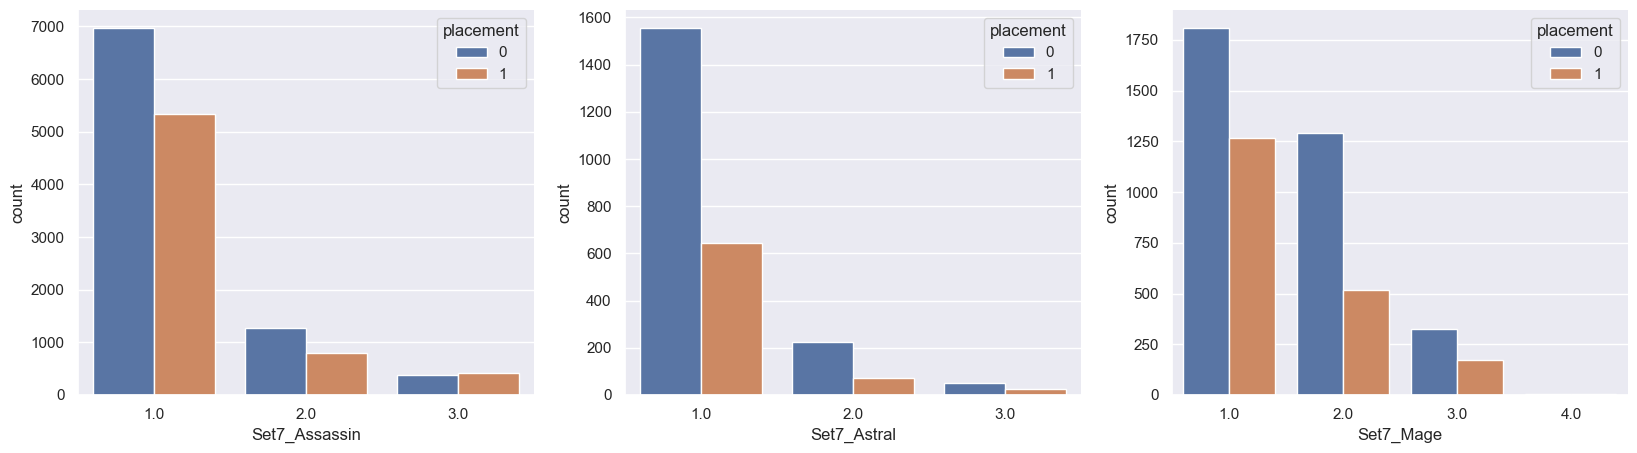

In [53]:
plt.figure(figsize=(20,5))


plt.subplot(131)
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_01[matches_01['Set7_Assassin']>0], x='Set7_Assassin', hue='placement')
sns.despine()


plt.subplot(132)
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_01[matches_01['Set7_Astral']>0], x='Set7_Astral', hue='placement')
sns.despine()


plt.subplot(133)
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_01[matches_01['Set7_Mage']>0], x='Set7_Mage', hue='placement')
sns.despine()

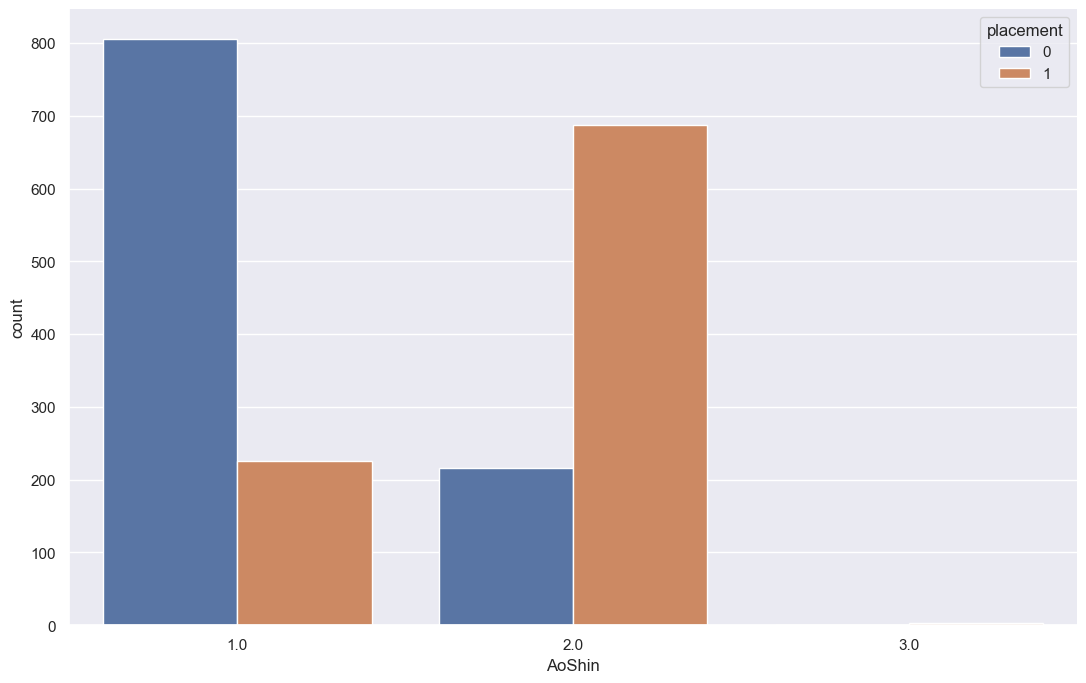

In [57]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_01[matches_01['AoShin']>0], x='AoShin', hue='placement')
sns.despine()

In [19]:
matches_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49144 entries, 0 to 49143
Columns: 150 entries, placement to Zoe_item
dtypes: float64(145), int32(4), int64(1)
memory usage: 55.5 MB


In [20]:
X_1 = matches_01[['match_id','augment0','augment1','augment2','Set7_Assassin','Set7_Astral',
                  'Set7_Bard','Set7_Bruiser','Set7_Cannoneer','Set7_Cavalier','Set7_Dragon','Set7_Dragonmancer','Set7_Evoker',
                  'Set7_Guardian','Set7_Guild','Set7_Jade','Set7_Legend','Set7_Mage','Set7_Mirage','Set7_Mystic','Set7_Ragewing',
                  'Set7_Revel','Set7_Scalescorn','Set7_Shapeshifter','Set7_Shimmerscale','Set7_SpellThief','Set7_Starcaller',
                  'Set7_Swiftshot','Set7_Tempest','Set7_Trainer','Set7_Warrior','Set7_Whispers']]
y_1 = matches_01['placement']


In [21]:

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(
                                        X_1,
                                        y_1,
                                        train_size   = 0.8,
                                        random_state = 34,
                                        shuffle      = True
                                    )


In [22]:
X_1_train = pd.DataFrame(X_1_train)
X_1_test = pd.DataFrame(X_1_test)
y_1_train=pd.DataFrame(y_1_train)
y_1_test=pd.DataFrame(y_1_test)

In [23]:
X_1_train.shape

(39315, 32)

<AxesSubplot:>

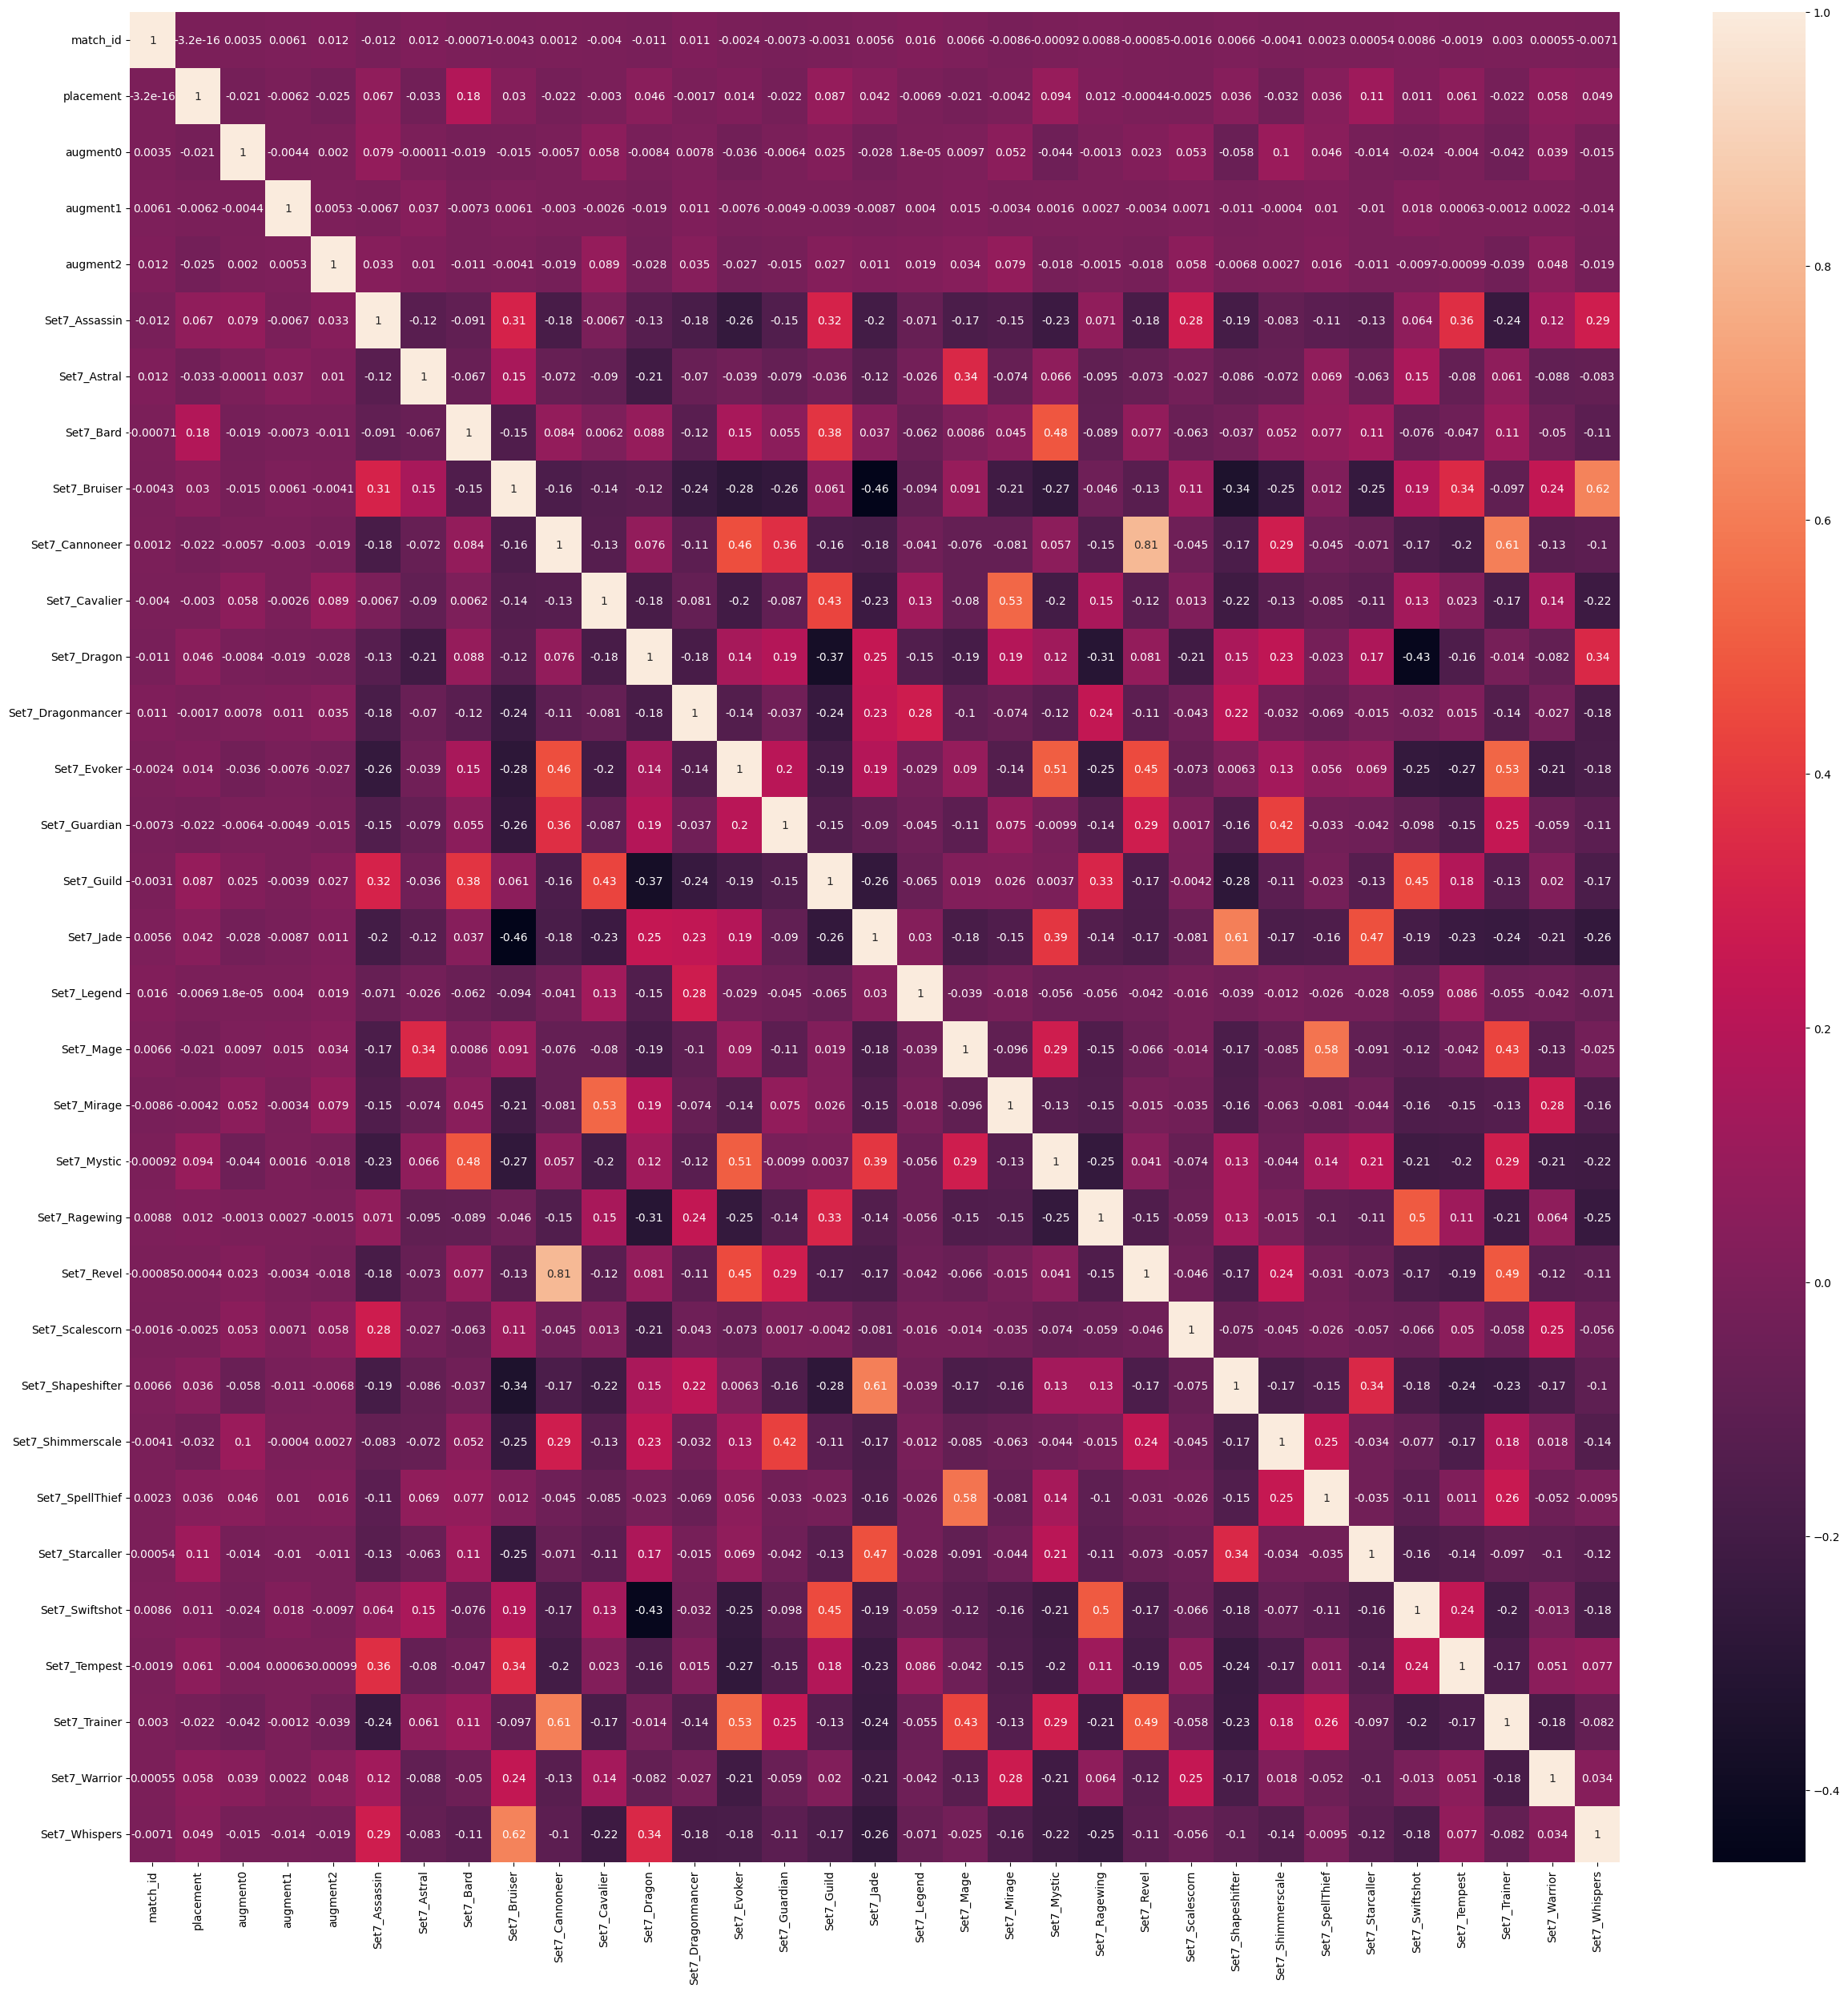

In [24]:
match=matches_01[['match_id','placement','augment0','augment1','augment2','Set7_Assassin','Set7_Astral',
                  'Set7_Bard','Set7_Bruiser','Set7_Cannoneer','Set7_Cavalier','Set7_Dragon','Set7_Dragonmancer','Set7_Evoker',
                  'Set7_Guardian','Set7_Guild','Set7_Jade','Set7_Legend','Set7_Mage','Set7_Mirage','Set7_Mystic','Set7_Ragewing',
                  'Set7_Revel','Set7_Scalescorn','Set7_Shapeshifter','Set7_Shimmerscale','Set7_SpellThief','Set7_Starcaller',
                  'Set7_Swiftshot','Set7_Tempest','Set7_Trainer','Set7_Warrior','Set7_Whispers']]
plt.figure(figsize=(30,30))
sns.heatmap(match.corr(), annot=True)

In [25]:
# sns.pairplot(matches_01, hue="placement")

In [3]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', 8)

In [27]:
X = matches_01.drop(['placement'], axis=1)
y = matches_01['placement']


In [28]:

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 34,
                                        shuffle      = True
                                    )



In [29]:
X_train=pd.DataFrame(X_train)
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

### Regrsion logistica

In [32]:
logisticRegr = LogisticRegression(max_iter=5000)

logisticRegr.fit(X_train, y_train)



LogisticRegression(max_iter=5000)

In [23]:
logModel=LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [100, 1000,2500, 5000]}
    ]
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# logModel.fit(X_train, y_train)

In [24]:
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2000 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Usuario\AppData\Local\Pro

In [25]:
best_clf.best_estimator_

LogisticRegression(C=0.08858667904100823, solver='newton-cg')

In [26]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.703


In [33]:
logModel=LogisticRegression(C=0.08858667904100823,
                            solver='newton-cg',
                            max_iter=1000)
logModel.fit(X_train, y_train)

LogisticRegression(C=0.08858667904100823, max_iter=1000, solver='newton-cg')

In [34]:
print('L2: ',logisticRegr.score(X, y))
print('L1: ',logModel.score(X,y))

L2:  0.6955477779586521
L1:  0.7028121439036301


In [36]:
predictions_log1=logisticRegr.predict(X_test)
predictions_log2=logModel.predict(X_test)


In [37]:
print(accuracy_score(y_test, predictions_log1))
print(accuracy_score(y_test, predictions_log2))


0.6909146403499847
0.6964085868348764


### KNN

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)
# Es categorico no creo que necesite escalado, peroo igual se prueba

In [43]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_1_train, y_1_train)


KNeighborsClassifier(n_neighbors=8)

In [46]:
print('score train', knn.score(X_1_train, y_1_train))
print('Score test', knn.score(X_1_test, y_1_test))

c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


score train 0.6252066641231082


c:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Score test 0.6241733645335232


### SVM


redes neuronales keras softmax 

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [23]:

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel = "poly", degree=2, coef0=1, C=1))
    ])
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=1, degree=2, kernel='poly'))])

In [26]:
svm_clf.score(X,y)

0.6392031580660915

In [26]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV


parameters = {
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'C': [0.001, 0.1, 0.5, 1, 5, 10],
    'degree': [1,2,3,4],
    'gamma': ['scale', 'auto']
}
svc = svm.SVC()

clf = GridSearchCV(estimator = svc,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring="accuracy")

clf.fit(X_1_train, y_1_train)

### Redes neuronales

In [56]:
num_classes = 4


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [57]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
model.fit(X_train, to_categorical(y_train, num_classes=num_classes), epochs=50, batch_size=32)

Epoch 1/50
1229/1229 [==============================] - 2s 1ms/step - loss: 3.5438 - accuracy: 0.5257
Epoch 2/50
1229/1229 [==============================] - 2s 1ms/step - loss: 1.7471 - accuracy: 0.5719
Epoch 3/50
1229/1229 [==============================] - 2s 1ms/step - loss: 1.5645 - accuracy: 0.5859
Epoch 4/50
1229/1229 [==============================] - 2s 1ms/step - loss: 1.4040 - accuracy: 0.5979
Epoch 5/50
1229/1229 [==============================] - 2s 1ms/step - loss: 1.3498 - accuracy: 0.6055
Epoch 6/50
1229/1229 [==============================] - 2s 1ms/step - loss: 1.1926 - accuracy: 0.6231
Epoch 7/50
1229/1229 [==============================] - 2s 1ms/step - loss: 1.1601 - accuracy: 0.6266
Epoch 8/50
1229/1229 [==============================] - 1s 1ms/step - loss: 1.1879 - accuracy: 0.6238
Epoch 9/50
1229/1229 [==============================] - 2s 1ms/step - loss: 1.0245 - accuracy: 0.6441
Epoch 10/50
1229/1229 [==============================] - 2s 1ms/step - loss: 1.025

In [60]:

loss, accuracy = model.evaluate(X_test, to_categorical(y_test))

308/308 [==============================] - 0s 1ms/step - loss: 0.8821 - accuracy: 0.6732


In [ ]:
loss, accuracy = model.evaluate(X_test, to_categorical(y_test, num_classes=num_classes))